# Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Построим распределение точек и отобразим их на графике.

In [3]:
count = 100

In [4]:
X = np.random.rand(count, 1)
y = 4 + 8 * X + np.random.randn(count, 1)

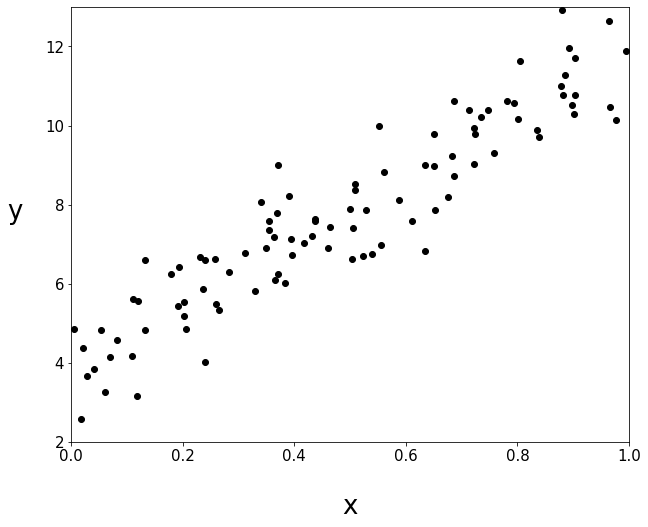

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='k')
plt.xlabel('x', fontsize=26, labelpad=30)
plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
plt.axis([0, 1, 2, 13])
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.show()

Чтобы аппроксимировать данные точки, необходимо найти параметры модели линейной регрессии. Это можно сделать с помощью **нормального уравнения**.

$\overline{\theta} = (X^TX)^{-1}X^Ty$

In [6]:
X_b = np.c_[np.ones((count, 1)), X]
thetas = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
thetas

array([[3.84762736],
       [8.14351018]])

Как можно видеть, это очень близко сходится с параметрами $\theta_0$ и $\theta_1$, равные 4 и 8 соответственно. Такое отклонение происходит из-за добавочного шума.

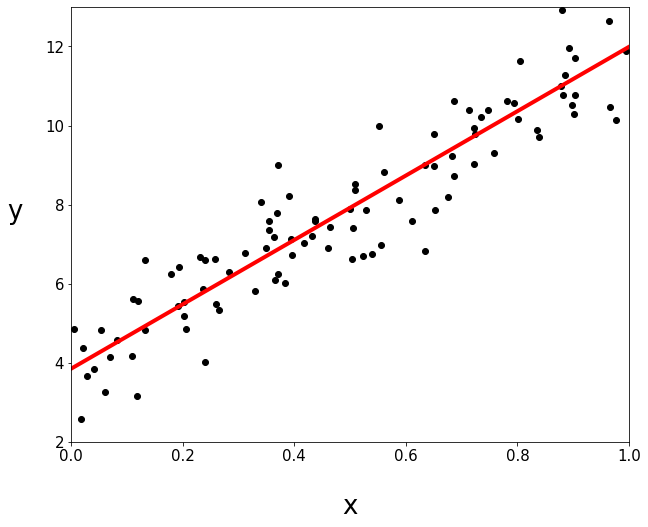

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='k')
plt.plot([[0], [1]], np.c_[np.ones((2, 1)), [[0],[1]]].dot(thetas), 'r', linewidth=4)
plt.xlabel('x', fontsize=26, labelpad=30)
plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
plt.axis([0, 1, 2, 13])
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.show()

Давайте посмотрим, что выдаст обученная модель линейной регрессии из Sklearn.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()
reg.fit(X, y)
reg.intercept_, reg.coef_

(array([3.84762736]), array([[8.14351018]]))

Как можно заметить, результаты практически полностью совпадают. Опять же, смещение происходит только из-за шума в самих данных.

# Градиентный спуск

Самый основной смысл градиентного спуска - это с помощью градиента функции потерь отыскать оптимальные параметры, минимизирующие функцию потерь. Т.е. такие параметры, при подстановке которых в модель, функция потерь будет иметь минимальное значение.

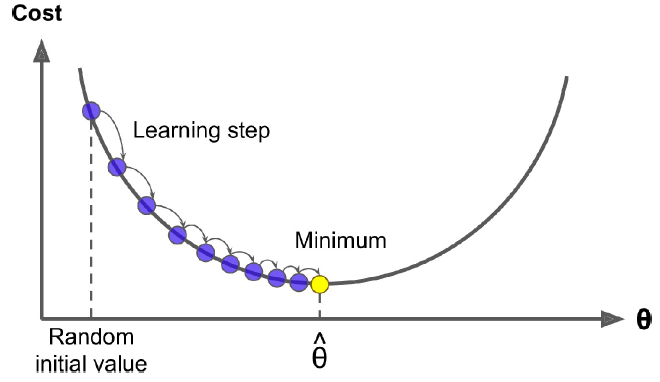

In [11]:
from IPython.display import Image
Image(data="./convergence.png")

Первым шагом вы инициализируете веса случайным образом (это называется **случайная инициализация**). Затем вы последовательно, шаг за шагом пытаетесь уменьшить функцию потерь до тех пор, пока алгоритм не сойдётся в минимуме.

In [12]:
thetas = np.random.randn(2, 1)
thetas

array([[ 0.5134802 ],
       [-1.66877524]])

Напишем функцию, реализующую градиентный спуск и проверим её результаты

In [13]:
def gradient_descent(n_iters, lr, thetas=None, thetas_path=None):
    if thetas is None:
        thetas = np.random.randn(2, 1)

    for n_iter in range(n_iters):
        grads = 2/count * X_b.T.dot(X_b.dot(thetas) - y)
        thetas = thetas - lr * grads
        
        if thetas_path is not None:
            thetas_path.append(thetas)
        
    return thetas

In [14]:
gradient_descent(10000, 0.01)

array([[3.84763516],
       [8.14349523]])

Важным параметром в градиентом спуске является **скорость обучения (learning rate)**. Если скорость обучения слишком маленькая, то алгоритму придётся совершить большое количество итераций, пока он не сойдётся к минимуму.

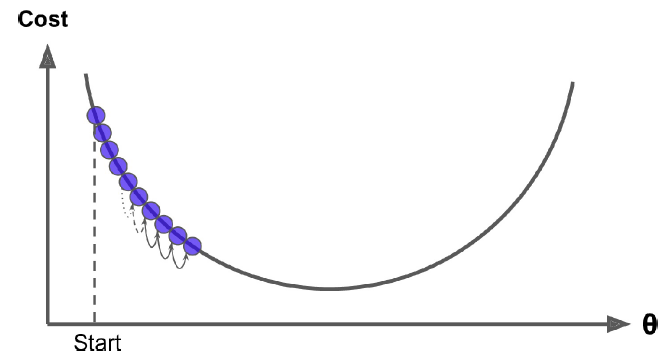

In [15]:
from IPython.display import Image
Image(data="./low_lr.png")

В противном случае, если скорость обучения слишком большая, то алгоритм будет как будто "перепрыгивать" точку минимума или вовсе начнёт расходиться.

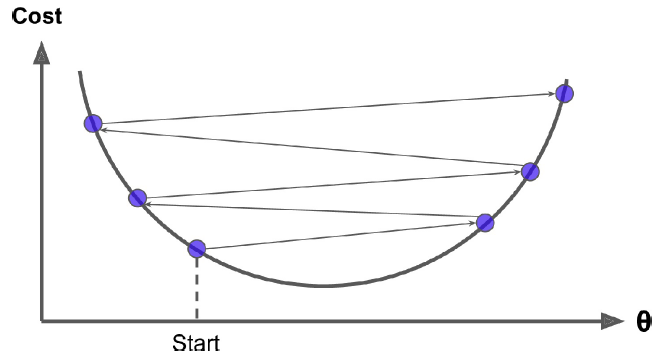

In [16]:
from IPython.display import Image
Image(data="./high_lr.png")

В конце концов, не все функции потерь являются выпуклыми. Могут быть совсем неровные функции с постоянными локальными минимумами. И в этом как раз заключается основная проблема - градиентный спуск может просто сойтись в локальный минимум, так и не отыскав глобальный. 

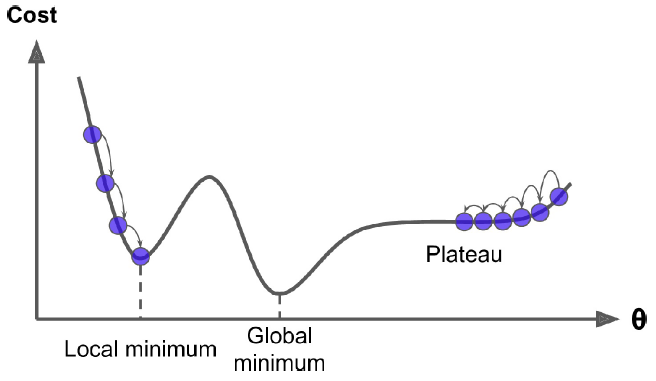

In [17]:
from IPython.display import Image
Image(data="./cost_func.png")

# Пакетный градиентный спуск

Чтобы реализовать градиентный спуск, необходимо вычислить градиент функции потерь для каждого параметра модели $\theta_j$. Другими словами, необходимо вычислить то, насколько сильно изменится функция потерь при небольшом изменении параметра $\theta_j$. Иначе это называется **частной производной**.

$\frac\delta{\delta\theta_j}MSE(\theta)=\frac2m\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})x^{(i)}_j$

Чтобы не вычислять каждую производную в отдельности, пользуются матричными операциями, такими же, какие мы применили до этого: `grads = 2/count * X_b.T.dot(X_b.dot(thetas) - y)`

Остаётся вопрос о том, где же фигурирует скорость обучения. Скорость обучения используется при пересчёте значения параметров. Вычисленные градиенты умножаются со скоростью обучения, а затем всё это вычитывается из прежнего значения параметров.

$\theta^{(следующий)}=\theta - \eta\bigtriangledown_\theta MSE(\theta)$

Это действие вполне логично. Градиент всегда указывает на то, какой наклон имеет функция потерь: он отрицательный, если функция потерь убывает, и положительная, если возрастает. В таком случае, если функция потерь возрастает, то вычитание градиента "заставит" градиентный спуск двигаться в противоположную возрастания функции сторону. Если функция потерь убывает, то вычитание градиента "заставит" двигаться градиентный спуск в ту же сторону (минус на минус).

Скорость обучения же здесь влияет на то, с какой скоростью будет происходить изменение параметров.

In [18]:
def plot_gd(X, y, thetas, lr, n_iters=1000, thetas_path=None, n_lines=15):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    line_iters = np.linspace(0, n_iters-1, n_lines, dtype=int)
    
    plt.scatter(X, y, c='k')
    for iteration in range(n_iters):
        if iteration == n_iters-1:
            style = 'r-'
            linewidth=4
            plt.plot([[0], [1]], np.c_[np.ones((2, 1)), [[0],[1]]].dot(thetas), style, linewidth=linewidth)
        else:
            style = 'g--'
            linewidth=2
        
        if iteration in line_iters:
            plt.plot([[0], [1]], np.c_[np.ones((2, 1)), [[0],[1]]].dot(thetas), style, linewidth=linewidth)
        
        grads = 2/count * X_b.T.dot(X_b.dot(thetas) - y)
        thetas = thetas - lr * grads
        if thetas_path is not None:
            thetas_path.append(thetas)
    
    plt.xlabel('x', fontsize=26, labelpad=30)
    plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
    plt.axis([0, 1, 2, 13])
    ax = plt.gca()
    ax.tick_params(labelsize=15)
    plt.title(f"lr = {lr}", fontsize=24)

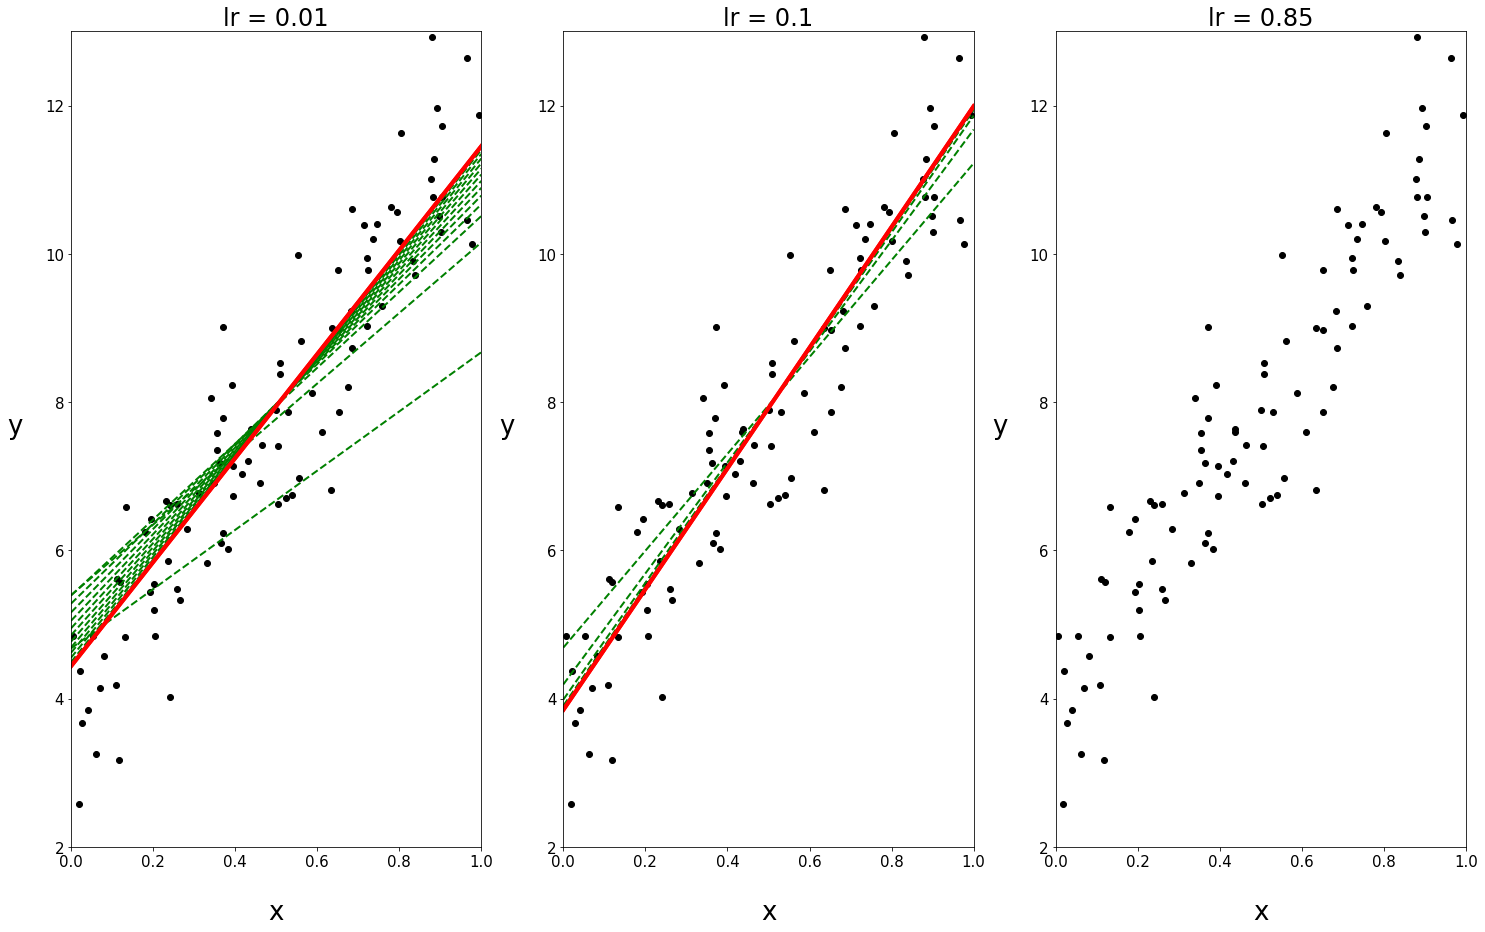

In [19]:
thetas = np.random.randn(2, 1)
bgd_thetas_path = []

plt.figure(figsize=(25, 15))
plt.subplot(131)
plot_gd(X, y, thetas, 0.01)
plt.subplot(132)
plot_gd(X, y, thetas, 0.1, thetas_path=bgd_thetas_path)
plt.subplot(133)
plot_gd(X, y, thetas, 0.85)

Рисунок выше отображает, как сходится (или не сходится) градиентный спуск при разных скоростях обучения.

# Стохастический градиентный спуск

Определим график обучения для изменения скорости обучения.

In [20]:
def learning_schedule(t, t1=5, t2=30):
    return t1 / (t + t2)

In [21]:
def plot_sgd(X, y, thetas, n_epochs=100, thetas_path=None, n_lines=5):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    line_iters = np.linspace(0, m-1, n_lines, dtype=int)
    
    plt.scatter(X, y, c='k')
    
    for epoch in range(n_epochs):
        if epoch == n_epochs-1:
                style = 'r-'
                linewidth=4
                plt.plot([[0], [1]], np.c_[np.ones((2, 1)), [[0],[1]]].dot(thetas), style, linewidth=linewidth)

        for iteration in range(m):
            if epoch == 0 and iteration in line_iters:
                plt.plot([[0], [1]], np.c_[np.ones((2, 1)), [[0],[1]]].dot(thetas), 'g--', linewidth=2)
        
            # Получаем случайный обучающий образец
            rnd_idx = np.random.randint(m)
            xi = X_b[rnd_idx:rnd_idx+1]
            yi = y[rnd_idx:rnd_idx+1]
            grads = 2 * xi.T.dot(xi.dot(thetas) - yi)
            lr = learning_schedule(epoch * m)
            thetas = thetas - lr * grads
            if thetas_path is not None:
                thetas_path.append(thetas)

        plt.xlabel('x', fontsize=26, labelpad=30)
        plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
        plt.axis([0, 1, 2, 13])
        ax = plt.gca()
        ax.tick_params(labelsize=15)
    return thetas

array([[3.85648359],
       [8.13362081]])

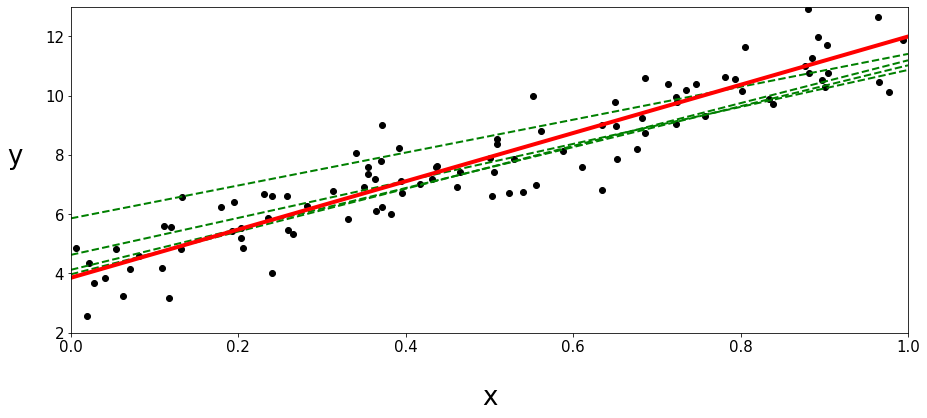

In [22]:
thetas = np.random.randn(2, 1)
sgd_thetas_path = []

plt.figure(figsize=(15, 6))
plot_sgd(X, y, thetas, n_epochs=300, thetas_path=sgd_thetas_path)

In [23]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=10000, eta0=0.15)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.15, max_iter=10000)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91178121]), array([8.03841917]))

Существует так же **минипакетный** градиентный спуск, который в данной тетради не рассматривается в виду того, что это почти то же самое.

Теперь давайте взглянем на то, как происходит нахождение оптимума функции потерь и то, как же подбираются параметры модели.

In [25]:
bgd_thetas_path = np.array(bgd_thetas_path)
sgd_thetas_path = np.array(sgd_thetas_path)

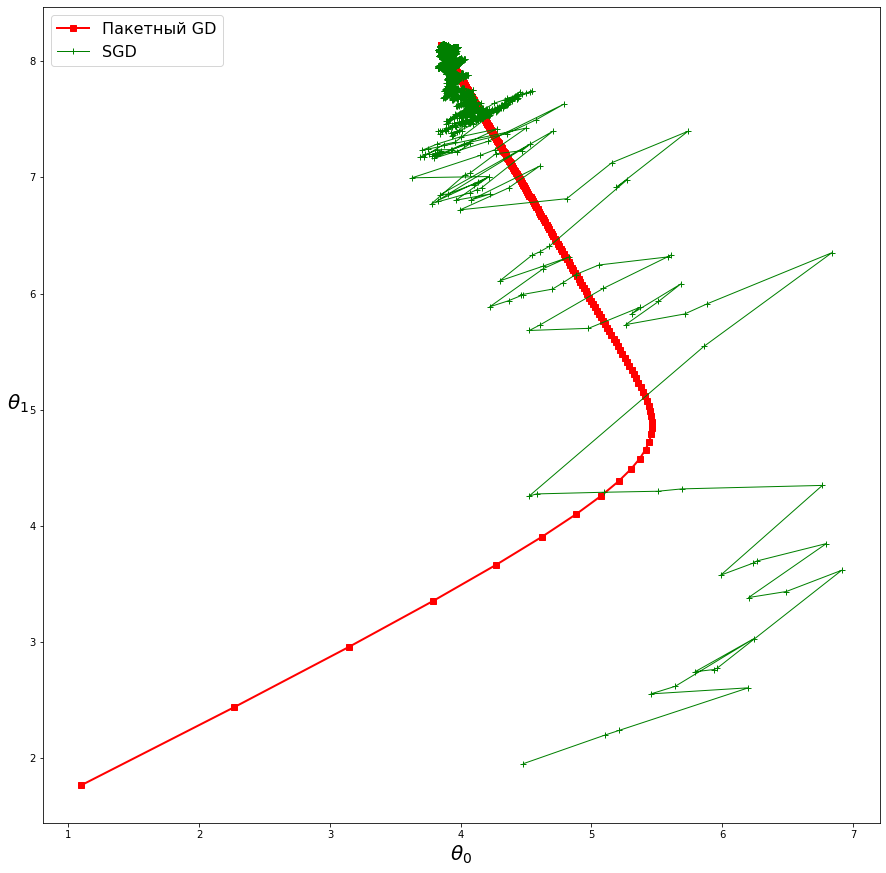

In [26]:
plt.figure(figsize=(15,15))
plt.plot(bgd_thetas_path[:, 0], bgd_thetas_path[:, 1], "r-s", linewidth=2, label="Пакетный GD")
plt.plot(sgd_thetas_path[:, 0], sgd_thetas_path[:, 1], "g-+", linewidth=1, label="SGD")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()

# Сравнение реализаций в Scikit-Learn

|Алгоритм|Большое m|Большое n|Масштабирование|Scikit-Learn|
|:----:|:------:|:------:|:------:|:------:|
|Нормальное уравнение|Быстро|Медленно|Не требуется|Нет|
|SVD|Быстро|Медленно|Не требуется|LinearRegression|
|Пакетный ГС|Медленно|Быстро|Требуется|SGDRegressor|
|Стохастический ГС|Быстро|Быстро|Требуется|SGDRegressor|

**m** - количество образцов в наборе  
**n** - количество признаков

# Полиномиальная регрессия

**PolynomialFeatures(degree=d)** трансформирует массив, содержащий n элементов в массив, содержащий $\frac{(n+d)!}{d!n!}$ элементов.

In [163]:
count = 200

In [164]:
X = 10 * np.random.rand(count, 1) - 5
y = 1 * X**2 + 1 * X + 4 + np.random.randn(count, 1)

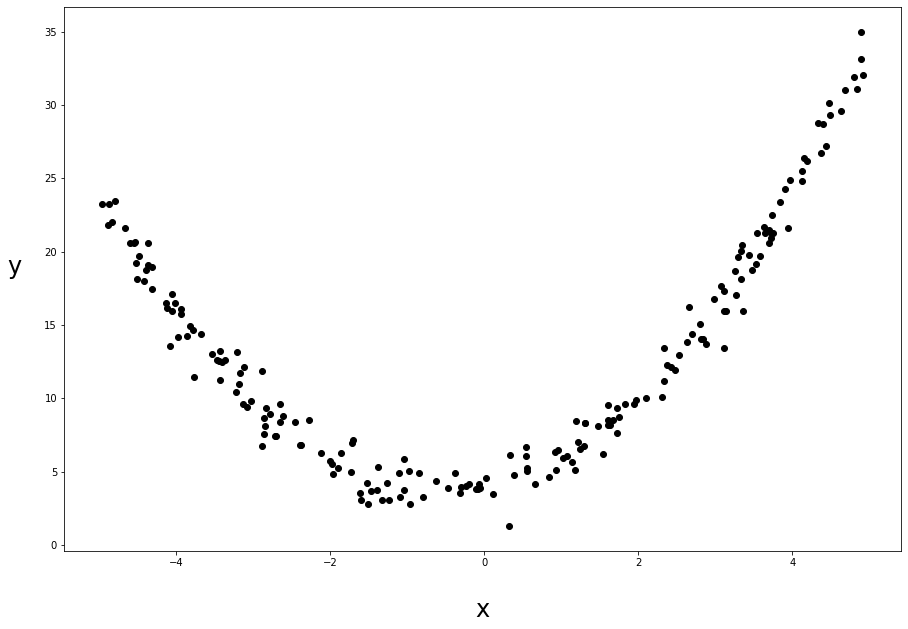

In [165]:
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c="k")
plt.xlabel("x", fontsize=24, labelpad=30)
plt.ylabel("y", rotation=0, fontsize=24, labelpad=30)
plt.show()

Теперь, чтобы аппроксимировать такие значения, необходимо добавить признаки (степени) в выборку и обучить на ней нашу линейную регрессию.

In [166]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [167]:
X_poly[0], X[0]

(array([ -3.4020223 ,  11.57375576, -39.37417524]), array([-3.4020223]))

In [168]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.98664633]),
 array([[1.03483417e+00, 1.00002326e+00, 1.57418102e-04]]))

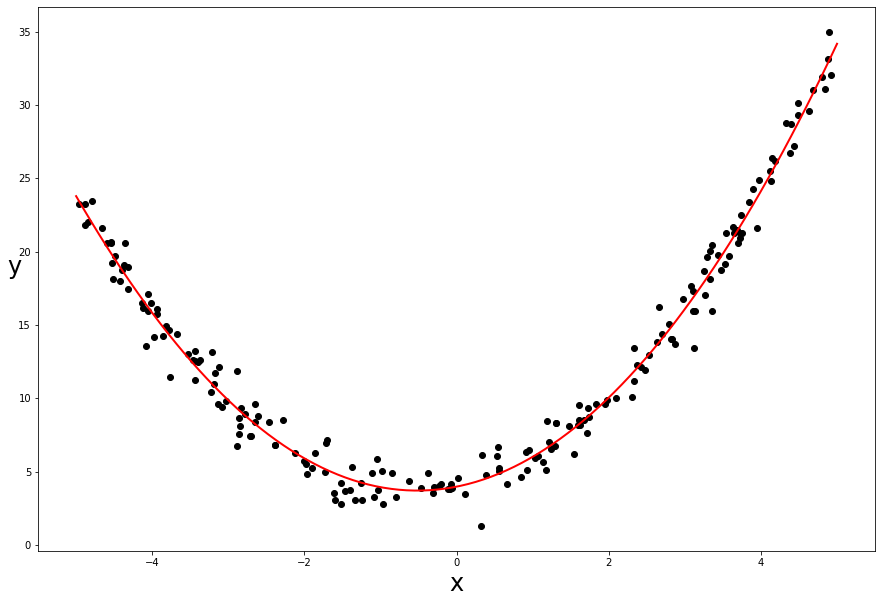

In [169]:
plt.figure(figsize=(15, 10))
X_predict = np.linspace(-5, 5, 100).reshape(-1, 1)
X_predict_poly = poly_features.transform(X_predict)
y_predict = lin_reg.predict(X_predict_poly)
plt.scatter(X, y, c="k")
plt.plot(X_predict, y_predict, "r-", linewidth=2)
plt.xlabel("x", fontsize=24)
plt.ylabel("y", rotation=0, fontsize=24)
plt.show()

# Кривые обучения

Один из способов понять, хороша ли ваша модель или нет - это посмотреть **кривые обучения**. Кривые обучения - это графики производительности модели, вычисленные на тренировочном и тестовом наборах. Чтобы получить значение производительности, необходимо тренировать модель на различных поднаборах обучающего набора (начиная с 1 обучающего образца и заканчивая всем набором), а оценивать на всём полном тестовом наборе данных.

In [181]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    train_errors, test_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="Тренировочный")
    plt.plot(np.sqrt(test_errors), "g-", linewidth=2, label="Тестовый")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Размер обучающего набора", fontsize=14)
    plt.ylabel("RMSE", fontsize=14) 
    plt.show()

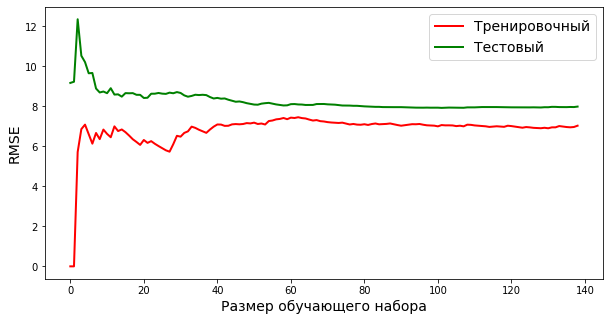

In [182]:
lin_reg = LinearRegression()
plt.figure(figsize=(10, 5))
learning_curves(lin_reg, X, y)

Полученные кривые обучения показывают факт **недообучения** модели, когда ошибка и на тренировочном, и на тестовом наборах данных высоки. Чтобы справиться с ошибкой недообучения модели, необходимо **повысить сложность** модели. Для этого добавим необходимые степени.

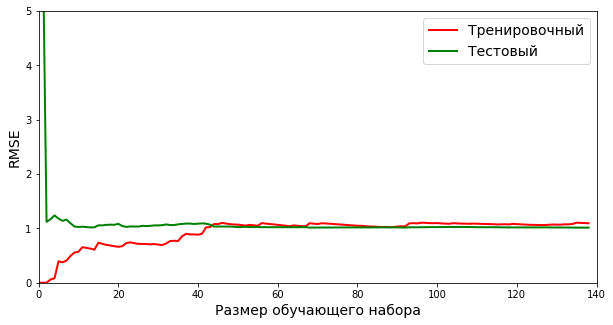

In [185]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
])

plt.figure(figsize=(10, 5))
plt.axis([0, 140, 0, 5])
learning_curves(polynomial_regression, X, y)

А вот теперь модель вполне себе имеет хорошие показатели. Ошибка на тренировочном и тестовом датасетах находятся близко друг к другу, что не говорит о **переобучении** и более того, они ещё достаточно небольшие, чтобы считать полученную модель качественной.

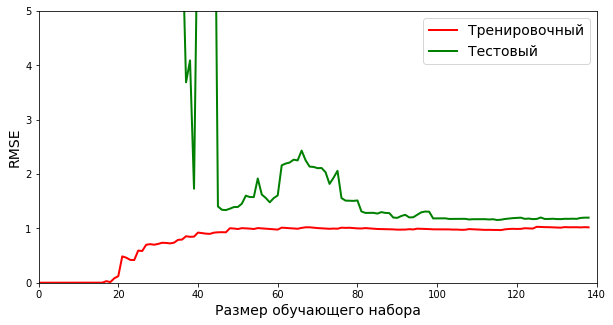

In [187]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("lin_reg", LinearRegression()),
])

plt.figure(figsize=(10, 5))
plt.axis([0, 140, 0, 5])
learning_curves(polynomial_regression, X, y)

Теперь на графике можно заметить явный пример **переобучения**. Это заметно ещё тогда, когда между тренировочной линией (красной) и тестовой линией (зелёной) существует большой разрыв, говорящий, что модель хорошо обучилась на тренировочном, но плохо обобщается.

# Регуляризация

**Регуляризация** - это метод ограничения модели с целью уменьшить вероятность её переобучения или ограничить её параметры.

## Гребневая регрессия

Гребневая регрессия (или регуляризация Тихонова) - это регуляризованная версия линейной регрессии. Член регуляризации равен $\alpha\sum_{i=1}^n\theta^2_i$, который добавляется в функцию потерь. Это заставляет модель  удерживать свои веса настолько маленькими, насколько это возможно.

**Функция потерь** для гребневой регрессии:  
$J(\theta)=MSE(\theta)+\alpha\frac12\sum_{i=1}^{n}\theta^2_i$

$\alpha$ - коэффициент регуляризации, регулирующий то, насколько сильно будет регуляризована модель.

___

### Нормы или меры расстояния

Перед тем, как двинуться дальше, необходимо пояснение о том, что такое **нормы** или **меры расстояния** векторов.

Различные функции стоимости, как например, **RMSE**, измеряет расстояние между двумя векторами (вектором предсказания и вектором правильных значений). В зависимости от того, как определено это расстояние (или иначе это называется **нормой**) пишут $l_2$ норма, говоря о RMSE или $l_1$ норма, говоря про MAE.

Норму $l_2$ обозначают $\|.\|_2$, а $l_1$ как $\|.\|_1$. В более общем виде норма записывается как $\|v\|_k = (|v_0|^k+|v_1|^k+...+|v_n|^k)^{1/k}$. Более высокая норма фокусируется на больших значениях и пренебрегает маленькими. Это одна из причин, почему RMSE более чувствительна к выбросам, чем MAE.

_____________________________________________

Регуляризационный член соответствует $\frac12(\|w\|_{2})^2$, где $\|w\|_{2}$ - $l_2$ норма вектора весов. 

In [188]:
count = 100
X = np.random.rand(count, 1)
y = 4 + 8 * X + np.random.randn(count, 1)

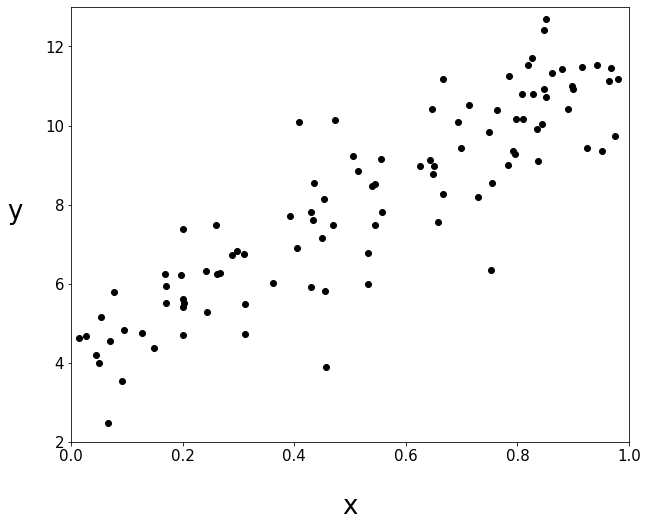

In [198]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c='k')
plt.xlabel('x', fontsize=26, labelpad=30)
plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
plt.axis([0, 1, 2, 13])
ax = plt.gca()
ax.tick_params(labelsize=15)
plt.show()

Попробуем аппроксимировать данные точки с помощью гребневой регрессии, реализованной в классе `Ridge`.

In [240]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [237]:
def plot_model(cls, alphas):
    X_new = np.linspace(0, 1, 100).reshape(100, 1)
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = cls(alpha)
        model = Pipeline([
                ("polynomial", PolynomialFeatures(degree=20, include_bias=False)),
                ("scaler", StandardScaler()),
                ("model", model)])
        model.fit(X, y)
        y_new = model.predict(X_new)
        plt.plot(X_new, y_new, style, linewidth=2, label=rf"$\alpha = {alpha}$")
    plt.scatter(X, y, c='k')
    plt.xlabel('x', fontsize=26, labelpad=30)
    plt.ylabel('y', fontsize=26, rotation=0, labelpad=30)
    ax = plt.gca()
    ax.tick_params(labelsize=15)
    plt.legend(loc="upper left", fontsize=16)

На графике продемонстрированы три прямых с разными коэффициентами регуляризации.

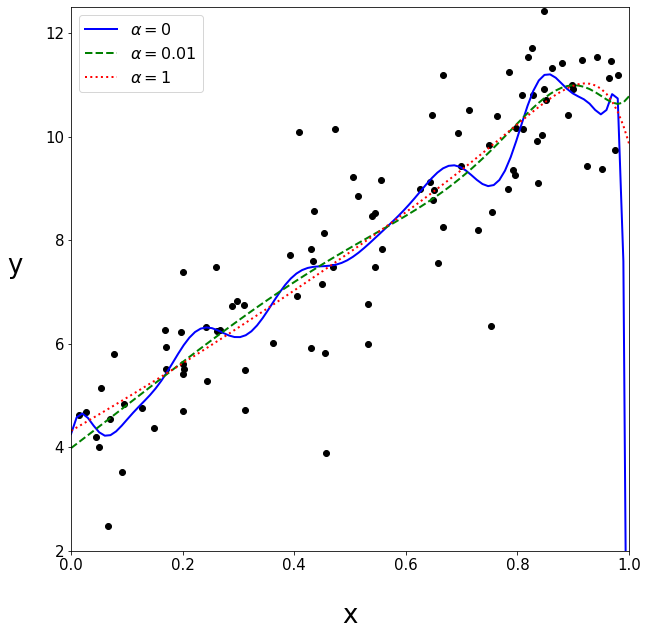

In [241]:
plt.figure(figsize=(10, 10))
plot_model(Ridge, alphas=(0, 0.01, 1))
plt.axis([0, 1, 2, 12.5])
plt.show()

Реализовать регуляризацию с помощью Sklearn можно так же с помощью нормального уравнения или градиентного спуска. Если необходимо реализвовать с помощью матричных операций, то можно использовать параметр `solver` в реализации класа `Ridge`. В противном случае, используйте `SGDRegressor(penalty="l2")`. 

Как можно догадаться, `penalty="l2"` это и есть та самая регуляризация на основе нормы `l2`, т.е. то же, что и гребневая регрессия.

In [246]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
ridge_reg.predict([[0.4]])

array([[7.21627608]])

In [247]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=10000)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[0.4]])

array([7.33843161])

## Лассо регрессия

**LASSO (Least Absolute Shrinkage and Selection Operator Regression)** - регуляризованная регрессия, похожая на гребневую, но вместо нормы $l_2$  эта регрессия использует норму $l_1$.

Формула функции потерь для Lasso-регрессии:

$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|$

In [248]:
from sklearn.linear_model import Lasso

/home/lpshkn/.local/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/lpshkn/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/lpshkn/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.456365840547896, tolerance: 0.05845110342496718
  model = cd_fast.enet_coordinate_descent(


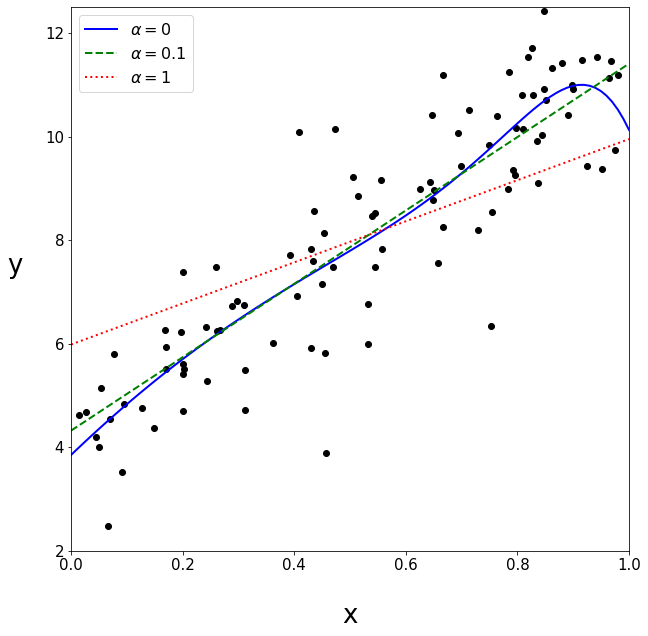

In [262]:
plt.figure(figsize=(10, 10))
plot_model(Lasso, alphas=(0, 0.1, 1))
plt.axis([0, 1, 2, 12.5])
plt.show()

Точно так же, как и в предыдущем варианте, вы можете использовать как класс `Lasso`, так и `SGDRegressor(penalty='l1')`.

In [268]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso.predict([[0.4]])

array([7.27013539])

In [269]:
sgd_reg = SGDRegressor(penalty='l1', max_iter=10000)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[0.4]])

array([7.33992801])

## Эластичная сеть

Эластичная сеть (Elastic Net) - это среднее между гребневой и лассо регрессией. Член регуляризации r просто смешивает обе регуляризации. Когда r = 0, то ElasticNet эквивалентен гребневой регрессии, а когда r = 1, то эквивалентен Лассо регрессии.

Функция потерь для эластичной сети:  
$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}2\alpha\sum_{i=1}^{n}\theta_i^2$

In [263]:
from sklearn.linear_model import ElasticNet

In [285]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.7)
elastic_net.fit(X,y)
elastic_net.predict([[0.4]])

array([7.45490913])

In [286]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=10000)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[0.4]])

array([7.33966257])